In [17]:
# Load libraries
import numpy as np
import scipy.signal
import h5py
import matplotlib.pyplot as plt

# Discovering the data
We have 4 datasets containing EEG data then spike train recordings

In [37]:
# Load the data in a dictionnary
data = {
    'ActivPark': h5py.File('samples/L23_f09_as_PARK.mat','r'),
    'SWAPark': h5py.File('samples/L23_f03_swa_PARK.mat','r'),
    'ActivCtl': h5py.File('samples/A9_c05_as_CTL.mat','r'),
    'SWACtl': h5py.File('samples/A9_c01_swa_CTL.mat','r')
    }

# Look at the variable names in each data file
for key,value in data.items():
    print(key)
    print(*data[key].keys(), end='\n\n')

ActivPark
L23_Beat_cycl L23_Beta_EEG L23_EEGipsi L23_Pr18_c08 L23_Pr20_c09 L23_Pr20_c0A L23_Pr20_c0B L23_Pr23_c0E L23_Pr25_c10 L23_Pr25_c11 L23_Pr26_c12 L23_SS_Pr_1 L23_SS_Pr_11 L23_SS_Pr_17 L23_SS_Pr_21 L23_SS_Pr_22 L23_SS_Pr_3 L23_SS_Pr_7 L23_SS_Pr_9

SWAPark
L23_EEGipsi L23_Pr20_c09 L23_Pr20_c0A L23_Pr20_c0B L23_Pr23_c0E L23_Pr23_c0F L23_Pr25_c10 L23_Pr25_c11 L23_SS_Pr_1 L23_SS_Pr_11 L23_SS_Pr_17 L23_SS_Pr_21 L23_SS_Pr_22 L23_SS_Pr_7

ActivCtl
A9_EEGipsi A9_P2021_c10 A9_P2021_c11 A9_Pr10_c0C A9_Pr10_c0D A9_Pr10_c0E A9_Pr17_c01 A9_Pr17_c10 A9_Pr1_c01 A9_Pr22_c12 A9_Pr22_c13 A9_Pr2_c02 A9_Pr2_c1B A9_Pr6_c05 A9_Pr8_c07 A9_Pr8_c08 A9_SS_Pr_25 A9_SS_Pr_3 A9_SS_Pr_4 A9_SS_Pr_9

SWACtl
A9_EEGipsi A9_P2021_c10 A9_P2021_c11 A9_Pr10_c0C A9_Pr10_c0D A9_Pr10_c0E A9_Pr1_c01 A9_Pr22_c12 A9_Pr22_c13 A9_Pr8_c07 A9_Pr8_c08 A9_Pr9_c09 A9_Pr9_c0A A9_Pr9_c0B A9_SS_Pr_11 A9_SS_Pr_2 A9_SS_Pr_25 A9_SS_Pr_3 A9_SS_Pr_4 A9_SS_Pr_6 A9_SS_Pr_7


In each dataset we have many parameters. For example, in spike trains recordings :
- comment
- length
- resolution
- times
- title

In [19]:
# Look up variable in a specific dataset
dict(data['ActivPark']['L23_Pr20_c09'])

{'comment': <HDF5 dataset "comment": shape (33, 1), type "<u2">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'resolution': <HDF5 dataset "resolution": shape (1, 1), type "<f8">,
 'times': <HDF5 dataset "times": shape (1, 725), type "<f8">,
 'title': <HDF5 dataset "title": shape (8, 1), type "<u2">}

In the EEF dataset we have:
- comment
- interval
- length
- offset
- scale
- start
- title
- units
- values

In [89]:
# Select a few datasets to work with: EEG and 3 spike trains from parkinsonian animals in 'activated state'
EEG=data['ActivPark']['L23_EEGipsi']
ST1=data['ActivPark']['L23_Pr20_c09']
ST2=data['ActivPark']['L23_Pr20_c0A']
ST3=data['ActivPark']['L23_Pr20_c0B']
dict(EEG)

{'comment': <HDF5 dataset "comment": shape (10, 1), type "<u2">,
 'interval': <HDF5 dataset "interval": shape (1, 1), type "<f8">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'offset': <HDF5 dataset "offset": shape (1, 1), type "<f8">,
 'scale': <HDF5 dataset "scale": shape (1, 1), type "<f8">,
 'start': <HDF5 dataset "start": shape (1, 1), type "<f8">,
 'title': <HDF5 dataset "title": shape (7, 1), type "<u2">,
 'units': <HDF5 dataset "units": shape (2, 1), type "<u2">,
 'values': <HDF5 dataset "values": shape (1, 35715), type "<f8">}

## Let's examine our EEG data...

In [90]:
# Find the number of sampling points in EEG trace (EEG[values])
EEG_number_sampling_points = EEG['values'].size
print('{} sampling points'.format(EEG_number_sampling_points))
# Equivalent à : number_sampling_points = int(EEG['length'][0][0])

# Find the duration of the recording as number of points time sampling interval (EEG[interval])
EEG_time_sampling_interval = EEG['interval'][0][0]
EEG_duration = EEG_time_sampling_interval * EEG_number_sampling_points
print('Recording duration: {:.0f} s'.format(EEG_duration))

35715 sampling points
Recording duration: 100 s


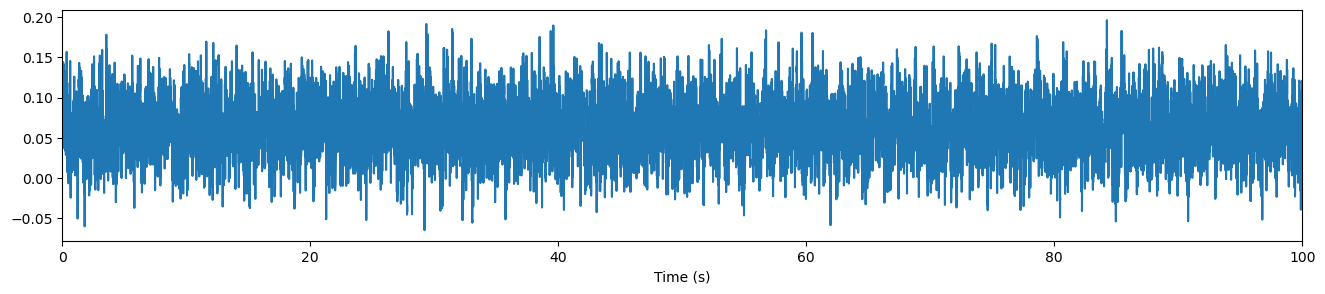

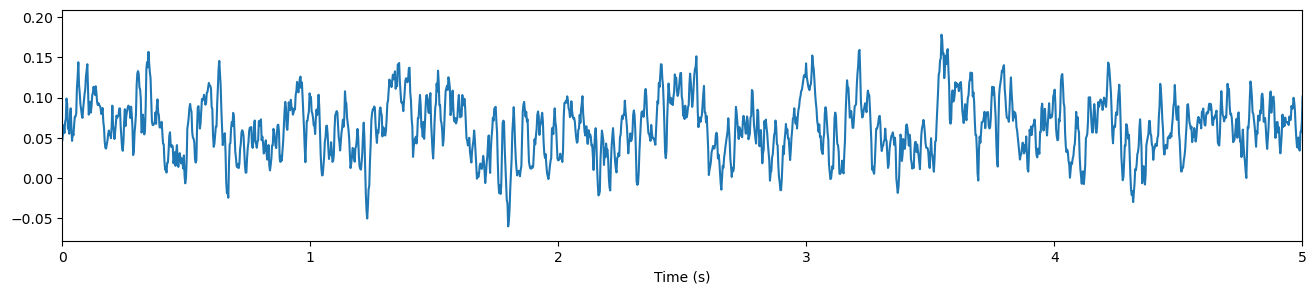

In [23]:
# Bonus step : let's look at this EEG
plt.figure(figsize=(16,3))
plt.plot(np.linspace(0, EEG_duration, EEG_number_sampling_points), EEG['values'][0])
plt.xlim(0, EEG_duration)
plt.xlabel('Time (s)')
plt.show()

# Not really nice, let's zoom in
plt.figure(figsize=(16,3))
plt.plot(np.linspace(0, EEG_duration, EEG_number_sampling_points), EEG['values'][0])
plt.xlim(0, 5)
plt.xlabel('Time (s)')
plt.show()

# TODO: ajouter titre des graphs et des axes

In [24]:
# Look up the 1000 first points in EEG trace
EEG_first_1000 = EEG['values'][0][:1000]
print(EEG_first_1000)

[ 0.04707336  0.05592346  0.06561279  0.05592346  0.06973267  0.07324219
  0.09887695  0.0919342   0.06164551  0.06080627  0.05500793  0.07705688
  0.08666992  0.06370544  0.04615784  0.0567627   0.05310059  0.06660461
  0.07629395  0.07659912  0.08026123  0.11238098  0.12542725  0.14404297
  0.11634827  0.10604858  0.0920105   0.08583069  0.07835388  0.07476807
  0.08636475  0.0958252   0.10437012  0.11070251  0.12664795  0.13458252
  0.14160156  0.10757446  0.07881165  0.08300781  0.09483337  0.08132935
  0.08934021  0.10299683  0.10620117  0.11352539  0.10719299  0.1033783
  0.11413574  0.10688782  0.09483337  0.09078979  0.09307861  0.09101868
  0.08956909  0.08743286  0.07965088  0.08262634  0.08705139  0.06988525
  0.06263733  0.04501343  0.03723145  0.03662109  0.04165649  0.04684448
  0.05462646  0.05905151  0.05401611  0.05378723  0.04951477  0.06324768
  0.09002686  0.06515503  0.05973816  0.04844666  0.05683899  0.06797791
  0.07766724  0.07507324  0.0769043   0.07843018  0.

## Now let's look at our spike trains

length: 725.0
resolution: 1.6e-06


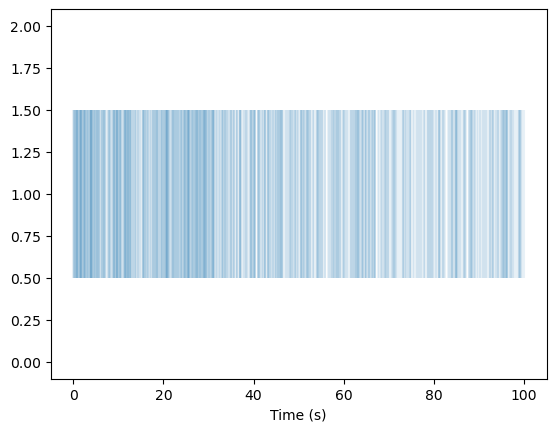

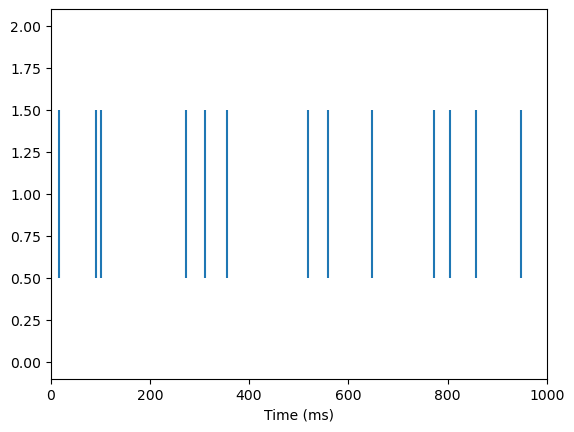

In [140]:
# Bonus step, let's look at what we can find into spike trains file
# Keys = comment length resolution times title
print('length:', ST1['length'][0][0])
print('resolution:', ST1['resolution'][0][0])

# In ST1['times'] we have a serie of spike times, we can display them on a raster plot
plt.eventplot(ST1['times'][0], alpha=0.1)
plt.xlabel('Time (s)')
plt.show()

# So now, let's zoom in
plt.eventplot(ST1['times'][0]*1000)
plt.xlabel('Time (ms)')
plt.xlim(0,1000)
plt.show()

# TODO: ajouter titre des graphs et des axes

# It's time to process some data to get nice figures

## Spectral power density histogram 

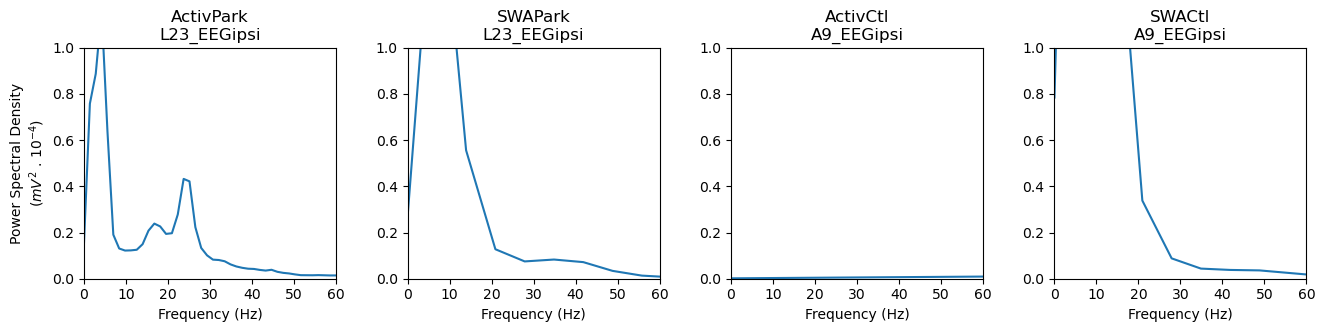

In [162]:
# Compute the spectral power density histogram (spectrum) of the EEG trace using scipy.signal.welch

# Initialize figure
plt.figure(figsize=(16,3))
ax = None
index = 0

# Load data for each group and display graphs of spectral power density
for data_file in data:

    # Get EEG recordings for each group
    # First find EEG filename among other keys
    # Here we are taking the first key that is containing "EEGipsi"
    eeg_filename = next(file_name for file_name in list(data[data_file].keys()) if "EEGipsi" in file_name)

    # Then select EEG file and load data
    eeg_file = data[data_file][eeg_filename]

    # Compute basic EEG data
    eeg_values = eeg_file['values'][0]
    eeg_frequency = 1 / eeg_file['interval'][0]

    # Compute the spectral power density
    eeg_spd_frequencies, eeg_spd = scipy.signal.welch(eeg_values, fs=eeg_frequency)

    # Plot the result
    ax = plt.subplot(1, 4, 1+index, aspect=55, sharey=ax)
    ax.plot(eeg_spd_frequencies, eeg_spd * 10000)
    ax.set_ylim(0,1)
    ax.set_xlim(0,60)
    ax.set_title('{}\n{}'.format(data_file, eeg_filename))
    ax.set_xlabel('Frequency (Hz)')
    # y label only for first figure
    if index == 0: ax.set_ylabel('Power Spectral Density\n($mV^2$ . $10^{-4}$)')
    
    index += 1

plt.show()

## Spike trains 

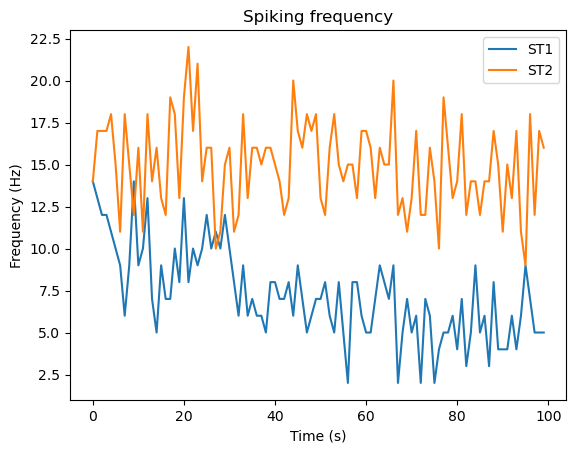

In [145]:
# Look up spike times for the two spike trains
# See above (raster plots)

# Display the times for the 2 firsts spike train
#plt.hist((ST1['times'][0], ST2['times'][0]), bins=100, label=("ST1","ST2"))
plt.plot(np.histogram(ST1['times'][0], bins=100)[0], label='ST1')
plt.plot(np.histogram(ST2['times'][0], bins=100)[0], label='ST2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spiking frequency')
plt.show()

In [148]:
# Make an instantaneous firing rate in bins of 1 ms using the function np.histogram

IFR1 = np.histogram(ST1['times'][0], bins=100000)[0]
# durée de l'enregistrement = 100 s donc pour avoir des "bins" de 1ms, on écrit "bins = 100000" (ce qui correspond à "découper en 100000")
# on prend le premier élément [0] qui correspond au "instantaneous firing rate"

# Prenons un peu d'avance, et calculons ça pour tous les spikes trains
IFR2 = np.histogram(ST2['times'][0], bins=100000)[0]
IFR3 = np.histogram(ST3['times'][0], bins=100000)[0]

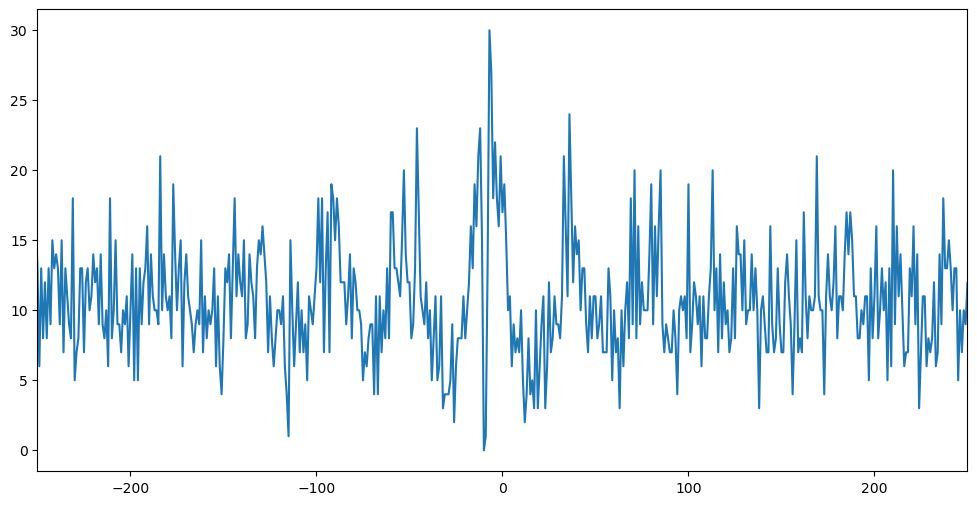

In [169]:
# Plot the cross-correlogram of instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 for delays from -250ms to +250ms
cross_corr_12 = scipy.signal.correlate(IFR1, IFR2)
cross_corr_lag_vector = np.linspace(-99999, 99999, len(cross_corr_12))
plt.figure(figsize=(12,6))
plt.plot(cross_corr_lag_vector, cross_corr_12)
plt.xlim(-250, 250)
plt.show()

# TODO: ajouter titre des graphs et des axes

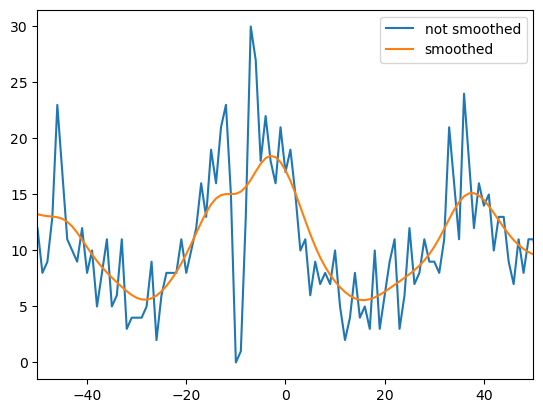

In [150]:
# Smooth the crosscorrelogram of instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 
# and plot for delays from -50ms to +50ms

# Je reprend la methode qu'on a vu la dernière fois, cependant je ne suis pas sur que ce soit le meilleur moyen de smooth le signal
window = np.arange(-10,10,0.1)          # Actual window over which to compute the Gaussian
gaussian = np.exp(-(window/0.5)**2)     # Gaussian function over window and standard deviation sigma
# Smoothed signal:
smooth_cross_corr_12 = np.convolve(cross_corr_12, gaussian, mode="same") / np.sum(gaussian)

plt.plot(cross_corr_lag_vector, cross_corr_12, label='not smoothed')
plt.plot(cross_corr_lag_vector, smooth_cross_corr_12, label='smoothed')
plt.xlim(-50,50)
plt.legend()
plt.show()

# TODO: ajouter titre des graphs et des axes

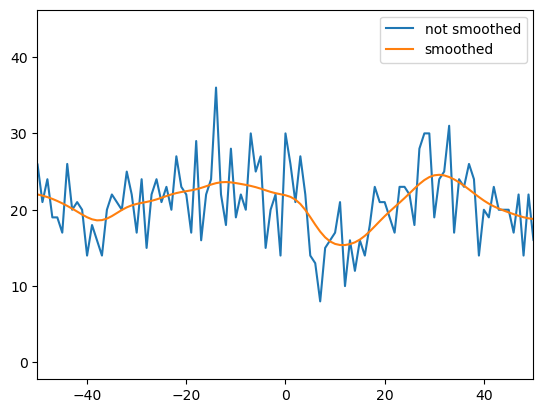

In [151]:
# Repeat the same procedure (cells 11 and 12) for spike trains 2 and 3
cross_corr_13 = scipy.signal.correlate(IFR1, IFR3)
smooth_cross_corr_13 = np.convolve(cross_corr_13, gaussian, mode="same") / np.sum(gaussian)

plt.plot(cross_corr_lag_vector, cross_corr_13, label='not smoothed')
plt.plot(cross_corr_lag_vector, smooth_cross_corr_13, label='smoothed')
plt.xlim(-50,50)
plt.legend()
plt.show()

# TODO: ajouter titre des graphs et des axes

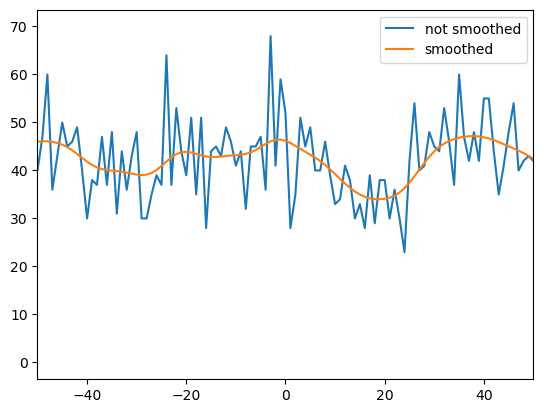

In [152]:
cross_corr_23 = scipy.signal.correlate(IFR2, IFR3)
smooth_cross_corr_23 = np.convolve(cross_corr_23, gaussian, mode="same") / np.sum(gaussian)

plt.plot(cross_corr_lag_vector, cross_corr_23, label='not smoothed')
plt.plot(cross_corr_lag_vector, smooth_cross_corr_23, label='smoothed')
plt.xlim(-50,50)
plt.legend()
plt.show()

# TODO: ajouter titre des graphs et des axes

Spike trains cross correlation for ActivPark
16 samples


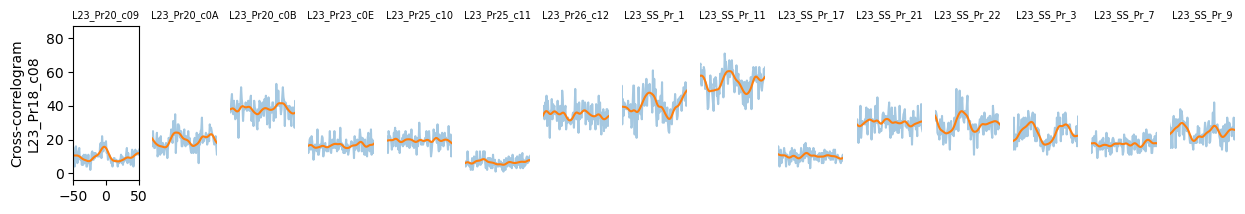

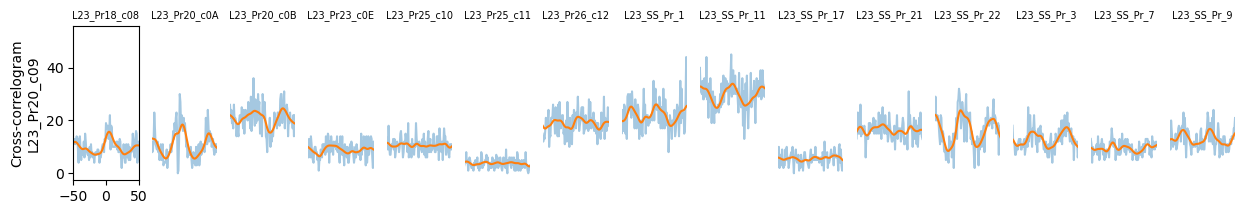

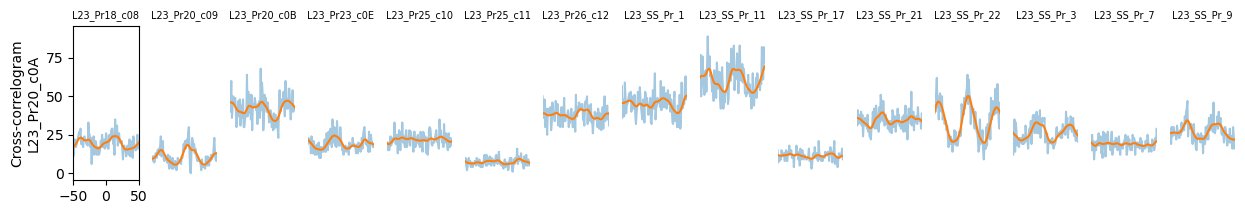

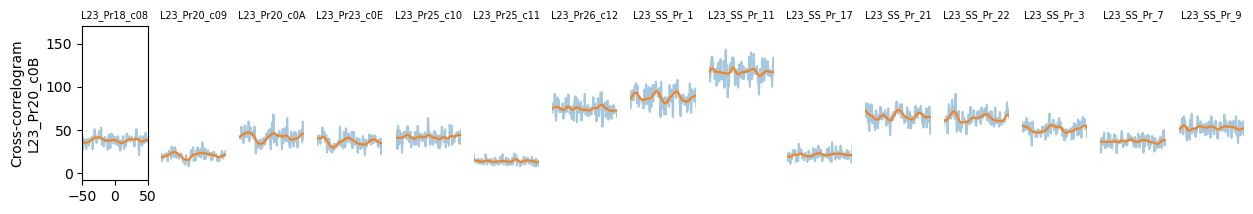

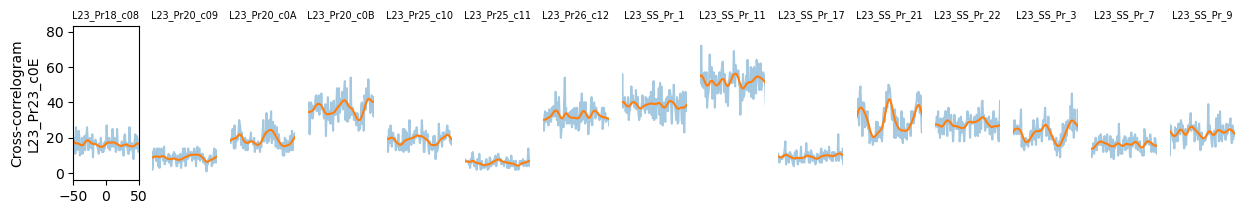

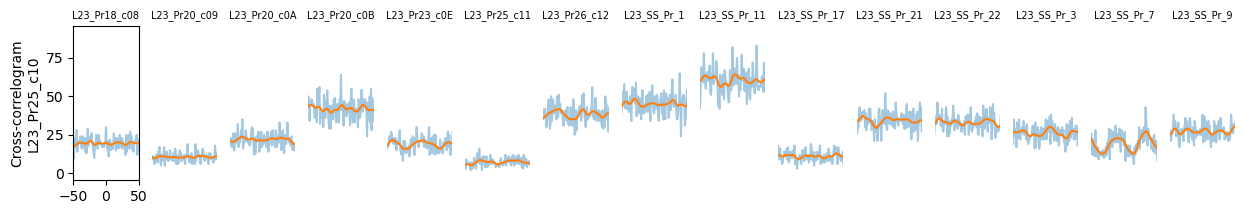

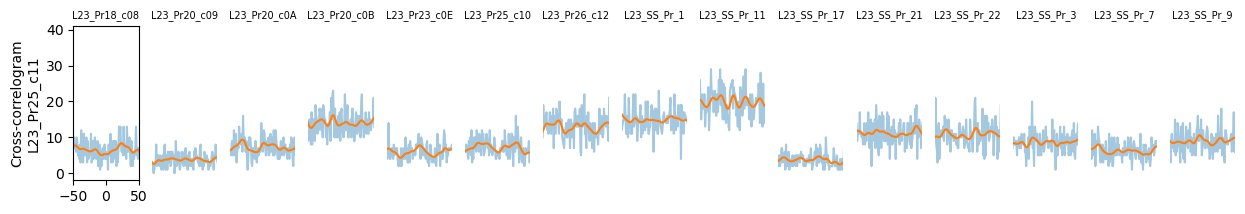

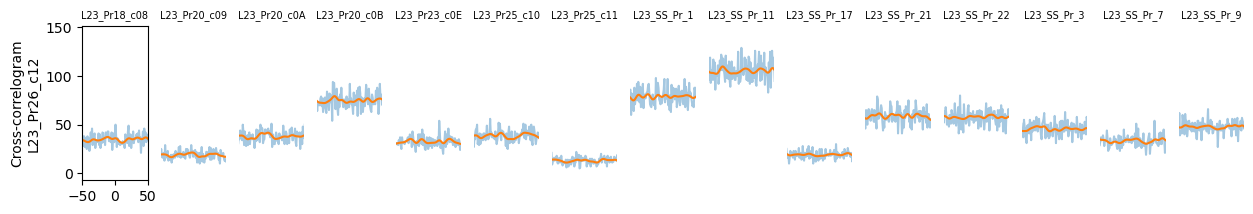

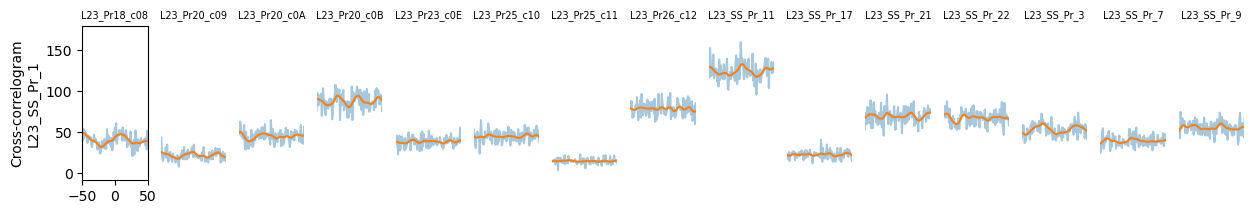

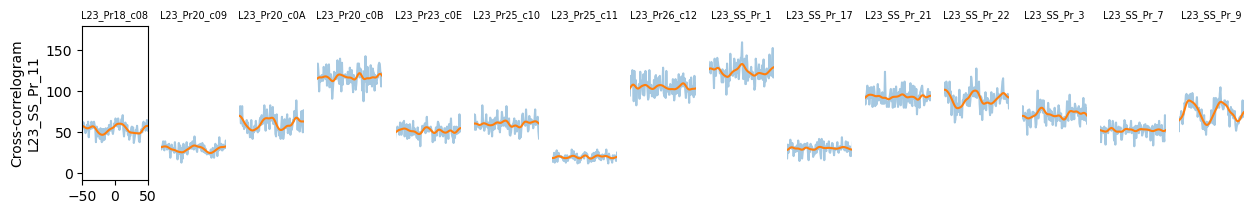

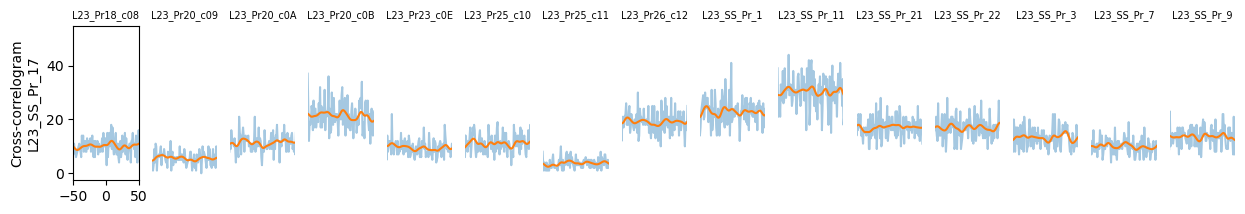

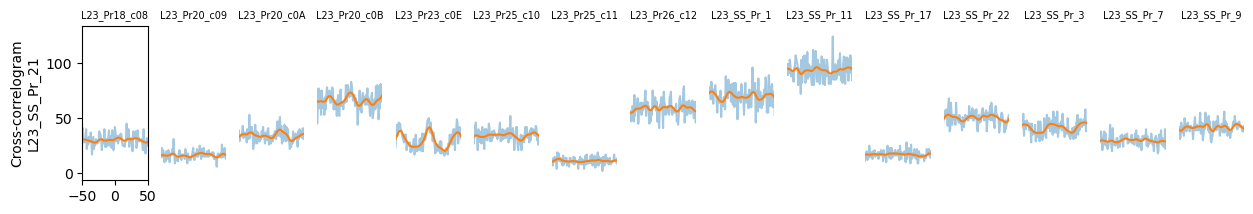

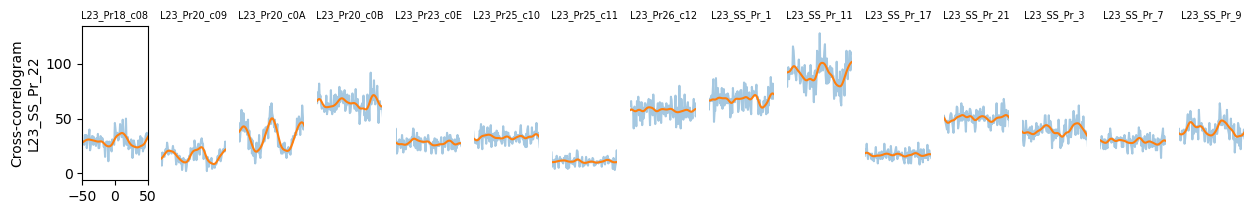

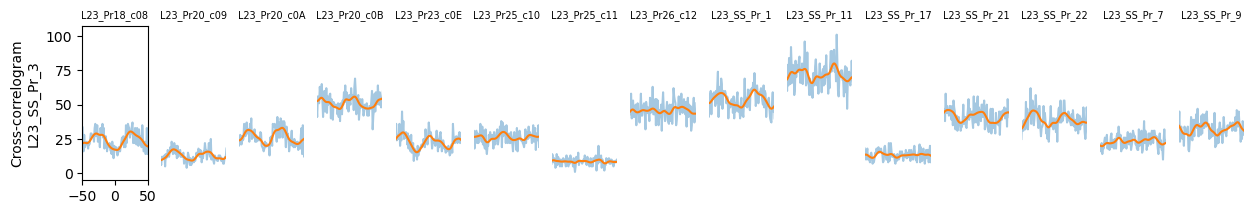

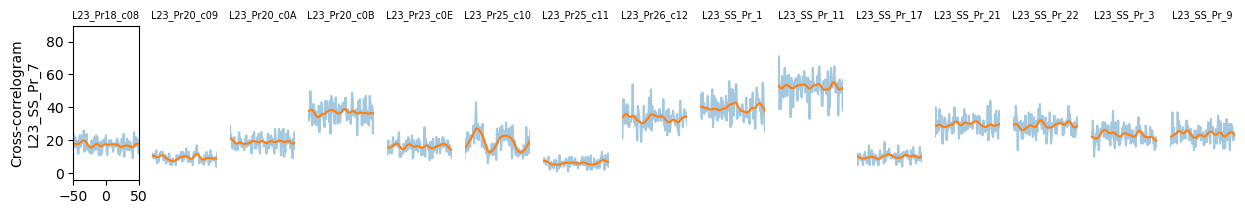

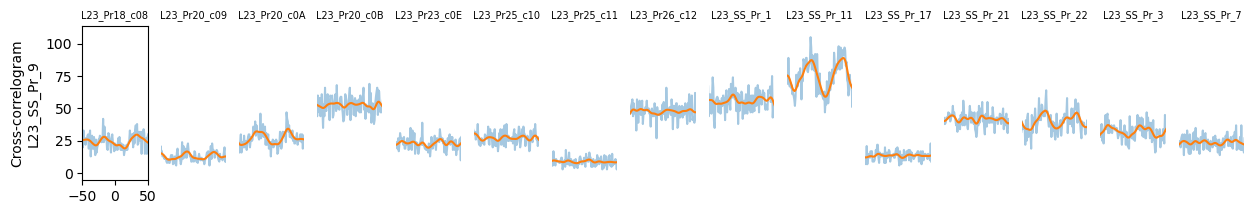

In [170]:
# Repeat the procedure (cell 11 and 12) for all pairs of spike trains recorded in this file (ActivPark)
# To this end, you may use the 'keys' of the dataset, corresponding to the various signals recorded simultaneously. 
# Note that the first 3 signals correspond to EEG or filtered EEG and will not be considered here. All other 
# recorded signals are spike trains 

st_keys = list(data['ActivPark'].keys())[3:]
print('Spike trains cross correlation for ActivPark')
print('{} samples'.format(len(st_keys)))

# Loop through all spike trains
for st_key_1 in st_keys:
    
    # Init figure
    plt.figure(figsize=(16,2))
    ax = None
    index = 0
    
    # Get the first spike trains data and IFR
    st_data_1 = data['ActivPark'][st_key_1]['times'][0]
    ifr_1 = np.histogram(st_data_1, bins=100000)[0]
    
    # Loop again through all spike trains
    for st_key_2 in st_keys:
        
        # Do not compute cross correlogram on itself
        if st_key_1 == st_key_2: continue

        # Get the second spike trains data and IFR
        st_data_2 = data['ActivPark'][st_key_2]['times'][0]
        ifr_2 = np.histogram(st_data_2, bins=100000)[0]

        # Compute cross-correlogram
        cross_corr = scipy.signal.correlate(ifr_1, ifr_2)
        cross_corr_lag = np.linspace(-99999, 99999, len(cross_corr))

        # Smooth it
        smooth_cross_corr = np.convolve(cross_corr, gaussian, mode="same") / np.sum(gaussian)

        # Plot it
        ax = plt.subplot(1, 16, 1+index, sharey=ax)
        ax.plot(cross_corr_lag, cross_corr, label='not smoothed', alpha=0.4)
        ax.plot(cross_corr_lag, smooth_cross_corr, label='smoothed')
        ax.set_xlim(-50,50)
        ax.set_title(st_key_2, fontdict={'fontsize': 7})
        # ax.set_xlabel('')
        # y label only for first figure
        if index == 0: ax.set_ylabel('Cross-correlogram\n{}'.format(st_key_1))
        else: ax.set_axis_off()
        index += 1

    # Display the graph
    plt.show()

# TODO: est-ce vraiment ce qu'il faut faire. Si oui, comment-est-ce qu'on s'en sert ?
# Juste comme un exemple

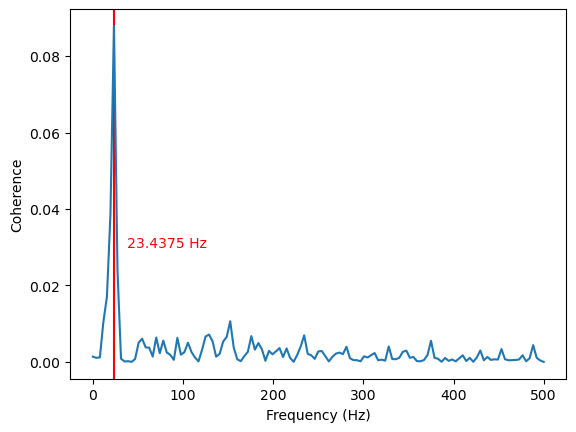

In [83]:
# Look at the coherence between instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 with function scipy.signal.coherence
coherence_12 = scipy.signal.coherence(IFR1, IFR2, fs=1000)
# fs = sampling frequency of series. Here sample size is 1 ms, so we have 1000 samples/s (1000 Hz)
max_coherence_12_index = coherence_12[1].argmax()
max_coherence_12_frequency = coherence_12[0][max_coherence_12_index]

# Plot a vertical line at maximal coherence and get the corresponding frequency using the function plt.axvline
plt.axvline(max_coherence_12_frequency, color='r')
plt.plot(coherence_12[0], coherence_12[1])
plt.text(max_coherence_12_frequency,0.03, '   {} Hz'.format(max_coherence_12_frequency), color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.show()

# TODO: ajouter titre des graphs et des axes

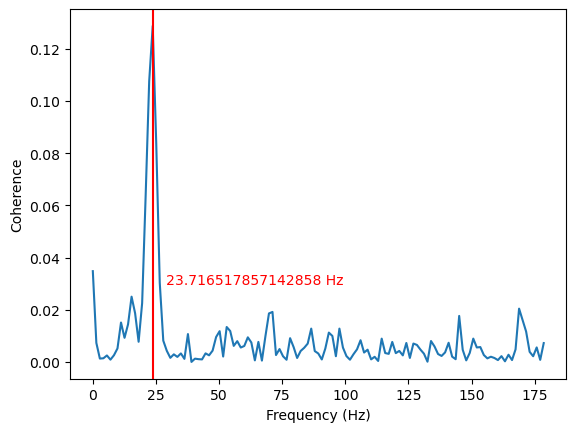

In [88]:
# We now want to compute the coherence between the EEG and the firing rates of single spike trains. 
# However, the coherence needs to be computed on signals that have the same sampling interval/rate

# First step: Recompute the IFR for a time bin similar to EEG sampling interval
EEG_frequency = 1/EEG_time_sampling_interval
bins_size = EEG_time_sampling_interval          # 2.8 ms
number_of_bins = round(100/bins_size)           # (sample size, 100 ms) / (bins_size, 2.8 ms) 
real_bins_size = 100/number_of_bins             # real size of bins (since we rounded the number of bins we won't have exactly bins_size

IFR1_resampled = np.histogram(ST1['times'][0], bins=number_of_bins)[0] / real_bins_size
IFR2_resampled = np.histogram(ST2['times'][0], bins=number_of_bins)[0] / real_bins_size
time_vector = np.arange(0, 100, EEG_time_sampling_interval*1000)
# TODO: c'est pas vraiment égal à la fréquence EEG donc pas vraiment la meilleure manière de faire. A revoir

# Second step: Look at the coherence between instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 with new time bin
coherence_12_resampled = scipy.signal.coherence(IFR1_resampled, IFR2_resampled, fs=EEG_frequency)
max_coherence_12_resampled_index = coherence_12_resampled[1].argmax()
max_coherence_12_resampled_frequency = coherence_12_resampled[0][max_coherence_12_resampled_index]
plt.plot(coherence_12_resampled[0], coherence_12_resampled[1])
plt.axvline(max_coherence_12_resampled_frequency, color='r')
plt.text(max_coherence_12_resampled_frequency,0.03, '   {} Hz'.format(max_coherence_12_resampled_frequency), color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.show()
# This coherence can compared to the one computed in cell 13.
# Plot a vertical line at maximal coherence and get the corresponding frequency

# TODO: ajouter titre du graphs

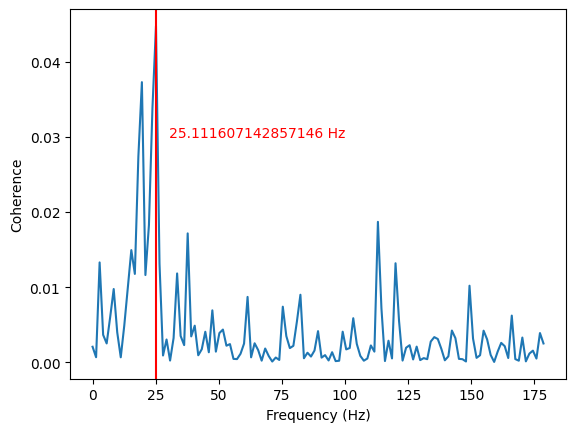

In [20]:
# Now we can compute the coherence between instantaneous firing rate (IFR) of a spike train and the EEG
coherence_1_EEG = scipy.signal.coherence(IFR1_resampled, EEG['values'], fs=EEG_frequency)

# Plot a vertical line at maximal coherence and get the corresponding frequency
coherence_1_EEG_index = coherence_1_EEG[1][0].argmax()
max_coherence_1_EEG_frequency = coherence_1_EEG[0][coherence_1_EEG_index]
plt.plot(coherence_1_EEG[0], coherence_1_EEG[1][0])
plt.axvline(max_coherence_1_EEG_frequency, color='r')
plt.text(max_coherence_1_EEG_frequency,0.03, '   {} Hz'.format(max_coherence_1_EEG_frequency), color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.show()

# TODO: ajouter titre du graphs

[1785.71428571]


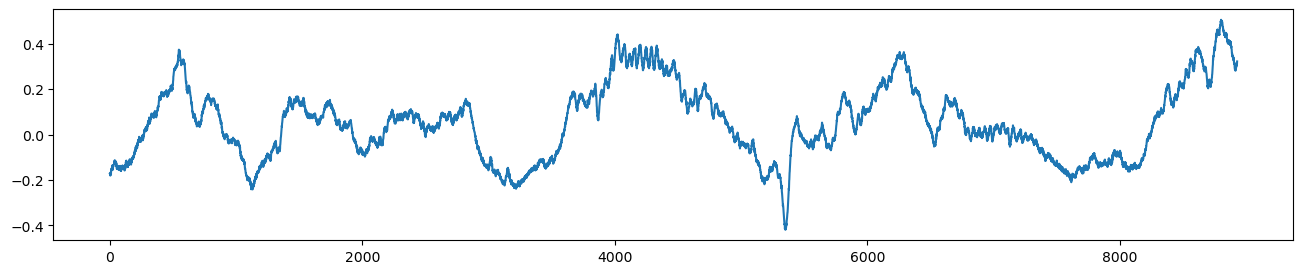

In [171]:
# Let's now look up a file with SWA activity in the cortex, and plot the 5 first seconds of this EEG
EEG=data['SWAPark']['L23_EEGipsi']
EEG_data=EEG['values'][0]
EEG_interval=EEG['interval'][0]
print(1/EEG_interval)

plt.figure(figsize=(16,3))
plt.plot(EEG_data[:int(5/EEG_interval)])
plt.show()

# TODO: ajouter titre des graphs et des axes

In [173]:
# Build a band pass filter with [0.5 1.5] Hz band for EEG using scipy.signal.butter
slow_waves_filter = scipy.signal.butter(3, [0.5, 1.5], btype='bandpass', fs=1/EEG_interval)

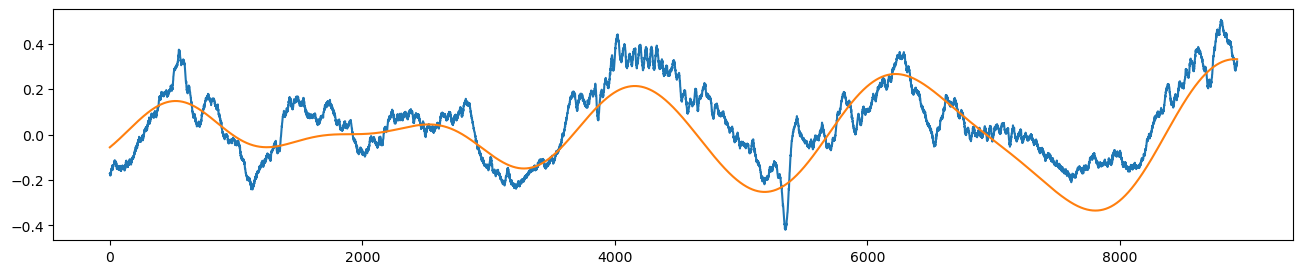

In [174]:
# Filter EEG with scipy.signal.filtfilt using the filter built in cell 18, and plot first 5 s of filtered EEG
eeg_slow_waves = scipy.signal.filtfilt(slow_waves_filter[0], slow_waves_filter[1], EEG_data)

plt.figure(figsize=(16,3))
plt.plot(EEG_data[:int(5/EEG_interval)])
plt.plot(eeg_slow_waves[:int(5/EEG_interval)])
plt.show()

# TODO: ajouter titre des graphs et des axes

3294
1.9998095999999999
98.0174096


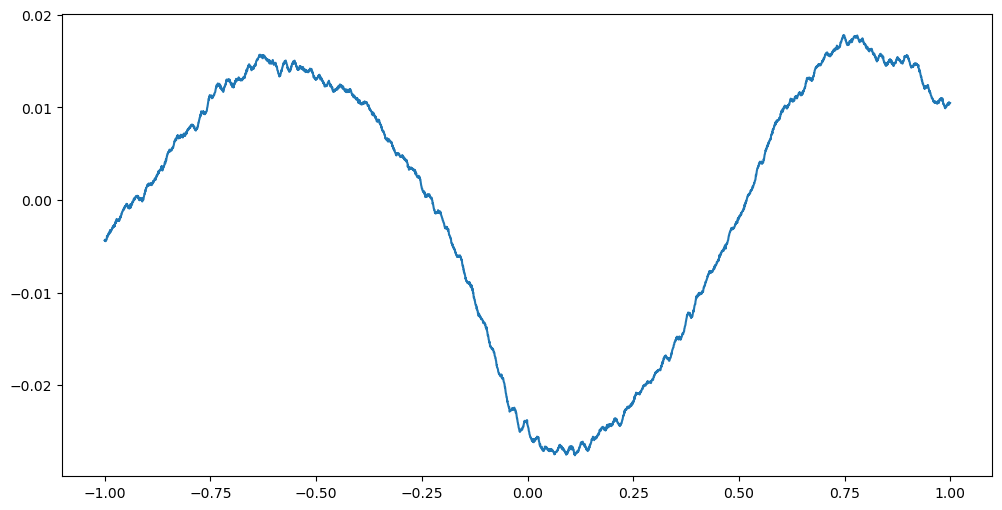

-0.024225651780057977


In [175]:
# Load one spike train and the EEG values and sampling interval from the SWAPark file
ST1=data['SWAPark']['L23_Pr20_c09'] 
ST1_times=ST1['times'][0]
print(len(ST1_times))

EEG=data['SWAPark']['L23_EEGipsi']
EEG_data=EEG['values'][0]
EEG_interval=EEG['interval'][0]


# Compute the spike-triggered average of the EEG trace with the first spike train
windowsec=2
windowint=windowsec/EEG_interval
t=np.arange(-windowsec/2,windowsec/2-EEG_interval,EEG_interval)
STA=np.zeros(int(windowint))
i1=np.argmin(np.abs(ST1_times-windowsec))
i2=np.argmin(np.abs(ST1_times-(len(EEG_data)*EEG_interval-windowsec)))
print(ST1_times[i1])
print(ST1_times[i2])
for i in range(i1,i2):
    STA += EEG_data[
           int(ST1_times[i+1]/EEG_interval)-int(windowint/2)-1
           :
           int(ST1_times[i+1]/EEG_interval)+int(windowint/2)
           ]

STA=STA/(len(ST1_times)-2)
STA=STA-np.mean(STA)
plt.figure(figsize=(12,6))
plt.plot(t,STA)
plt.show()

# Value of the spike-triggered average at 0 time lag
print(STA[int(windowint/2)])

# TODO: ajouter titre des graphs et des axes

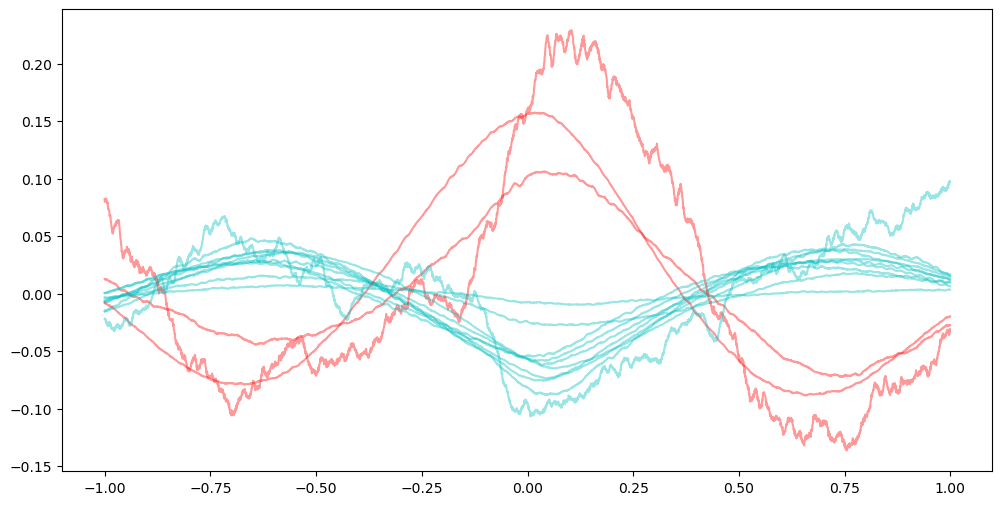

In [184]:
# Compute and plot the spike-triggered averages of the EEG with respect to all spike trains recorded in this SWAPark file
# You may use the keys of the data['SWAPark'] data set
# Save the value of the spike-triggered average at 0 time lag for all considered spike trains

STs = list(data['SWAPark'])[1:]
STa = {}
plt.figure(figsize=(12,6))

for spike_key in STs:
    ST = data['SWAPark'][spike_key]
    ST_times=ST['times'][0]

    i1=np.argmin(np.abs(ST_times-windowsec))
    i2=np.argmin(np.abs(ST_times-(len(EEG_data)*EEG_interval-windowsec)))
    # print(ST_times[i1])
    # print(ST_times[i2])
    
    for i in range(i1,i2):
        STA += EEG_data[int(ST_times[i+1]/EEG_interval)-int(windowint/2)-1:int(ST_times[i+1]/EEG_interval)+int(windowint/2)]

    STA=STA/(len(ST_times)-2)
    STA=STA-np.mean(STA)
    color = 'c' if STA[int(windowint/2)] < 0 else 'r'
    plt.plot(t, STA, color=color, alpha=0.4)

    # Value of the spike-triggered average at 0 time lag
    STa[spike_key] = STA[int(windowint/2)]

plt.show()


# TODO: ajouter titre des graphs et des axes

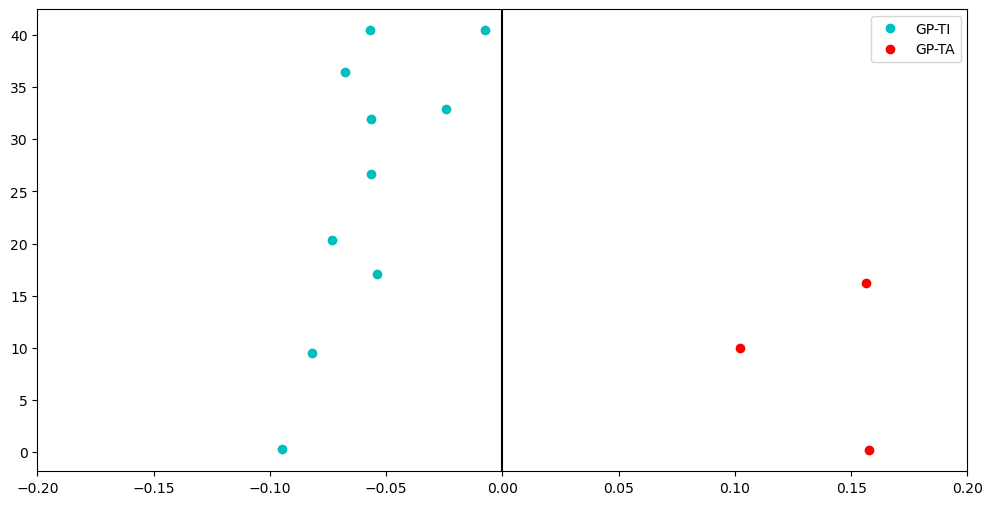

In [209]:
# For each spike train in the data set, compute the mean firing rate 

STt = {}
STt_GP_TI = {}
STt_GP_TA = {}
STt_GP_TIt = {}
STt_GP_TAt = {}

for spike_key in STs:
    ST = data['SWAPark'][spike_key]
    ST_length=ST['length'][0]
    #STt[spike_key] = ST_length / 100
    if (STa[spike_key] < 0):
        STt_GP_TIt[spike_key] = STa[spike_key]
        STt_GP_TI[spike_key] = ST_length / 100
    else:
        STt_GP_TAt[spike_key] = STa[spike_key]
        STt_GP_TA[spike_key] = ST_length / 100

# Plot the mean firing rate of the spike trains vs the value of the spike-triggered average at 0 time lag
plt.figure(figsize=(12,6))
#plt.plot(list(STa.values()), list(STt.values()), 'o', color='k')
plt.plot(list(STt_GP_TIt.values()), list(STt_GP_TI.values()), 'o', color='c', label='GP-TI')
plt.plot(list(STt_GP_TAt.values()), list(STt_GP_TA.values()), 'o', color='r', label='GP-TA')
plt.xlim(-0.2, 0.2)
plt.axvline(0, color='k')
plt.legend()
plt.show()

# TODO: ajouter titre des graphs et des axes
# TODO: mettre une barre et un texte pour séparer les 2 groupes